In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


引入環境

In [2]:
!pip install mglearn
import mglearn
!pip install scikit-learn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.datasets import make_blobs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=21ba5f25ee6a8000de56d56d4a37d6df501422533168c0a6ad862e74f53849ec
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


引入訓練集資料

In [3]:
train_text = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
print(len(train_text))
train_text.head(50)

1460


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
train_text.shape

(1460, 81)

引入測試集資料

In [5]:
test_text = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
print(len(test_text))
test_text.head()

1459


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
test_text.shape

(1459, 80)

In [7]:
import seaborn as sns

觀察缺失資料

<AxesSubplot:>

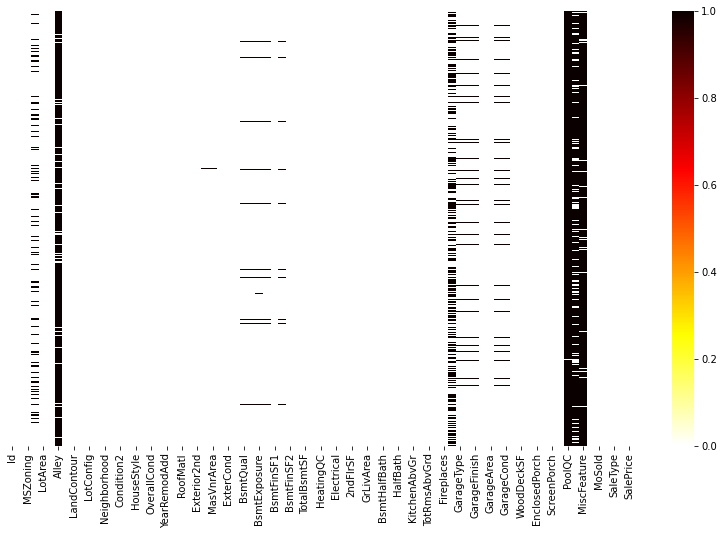

In [8]:
plt.figure(figsize=(14,8))
sns.heatmap(train_text.isnull(), yticklabels=False, cmap='hot_r')

<AxesSubplot:>

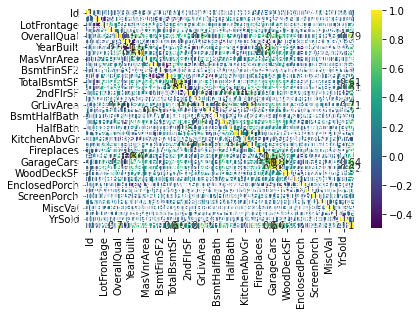

In [9]:
sns.heatmap(train_text.corr(),annot = True,cmap="viridis")

<AxesSubplot:>

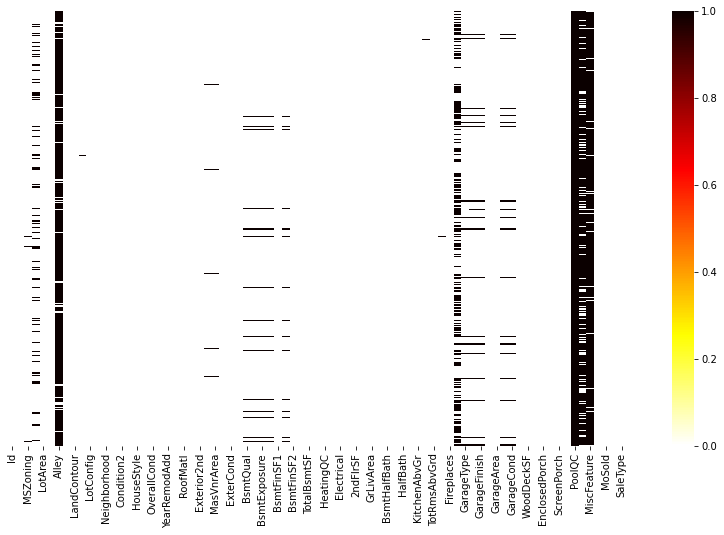

In [10]:
plt.figure(figsize=(14,8))
sns.heatmap(test_text.isnull(), yticklabels=False, cmap='hot_r')

<AxesSubplot:>

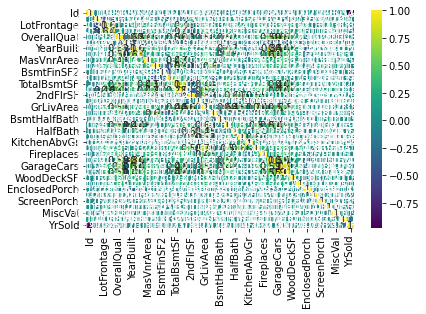

In [11]:
sns.heatmap(test_text.corr(),annot = True,cmap="viridis")


In [12]:
sample_text = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
print(len(sample_text))
sample_text.head()

1459


,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [13]:
train_text.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [14]:
test_text.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

觀看資料形式

In [15]:
train_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [16]:
test_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [17]:
train_text.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [18]:
train_text.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [19]:
print(train_text.LotFrontage.value_counts())

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64


處理連續資料

In [20]:
float_data = ['LotFrontage']
train_text[float_data] = train_text[float_data].fillna(train_text[float_data].mean())

In [21]:
train_text.isna().sum().head(80)

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

<AxesSubplot:>

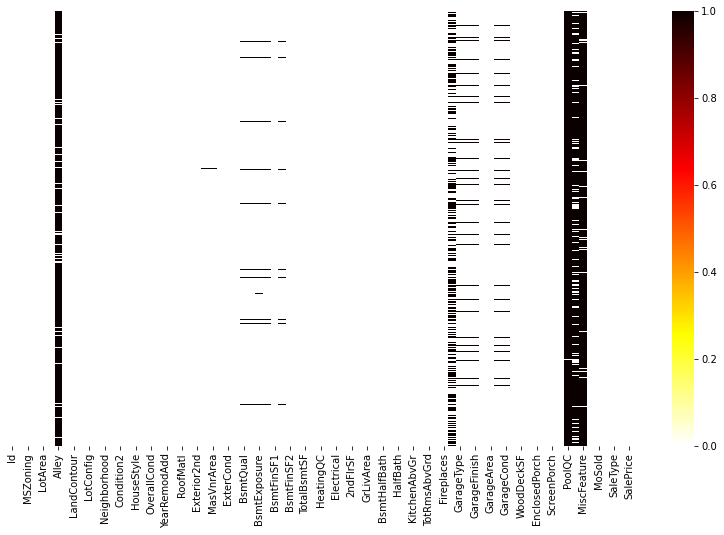

In [22]:
plt.figure(figsize=(14,8))
sns.heatmap(train_text.isnull(), yticklabels=False, cmap='hot_r')

處理非連續資料

In [23]:
print(train_text.Alley.value_counts())

Grvl    50
Pave    41
Name: Alley, dtype: int64


In [24]:
train_text.Alley.fillna(train_text.Alley.mode()[0], inplace=True)

In [25]:
test_text.Alley.fillna(test_text.Alley.mode()[0], inplace=True)

<AxesSubplot:>

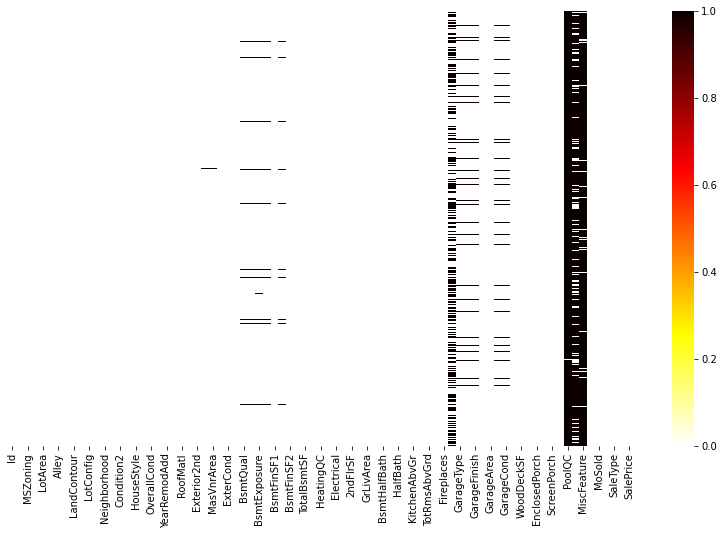

In [26]:
plt.figure(figsize=(14,8))
sns.heatmap(train_text.isnull(), yticklabels=False, cmap='hot_r')

In [27]:
train_text.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [28]:
train_text.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

<AxesSubplot:>

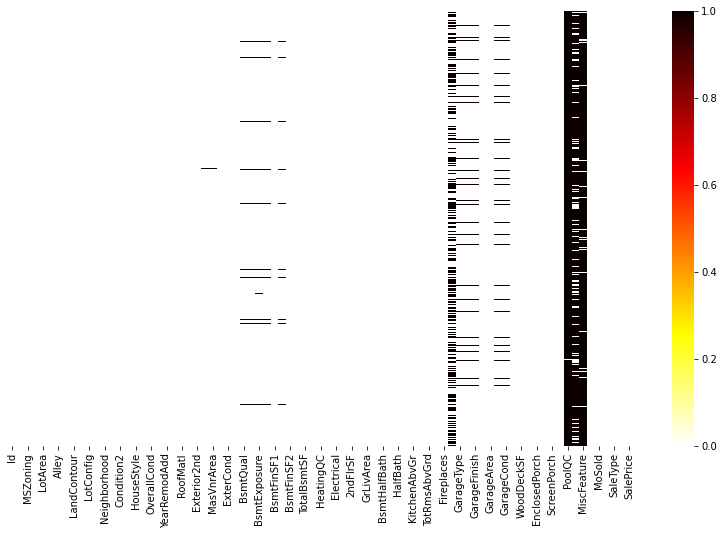

In [29]:
plt.figure(figsize=(14,8))
sns.heatmap(train_text.isnull(), yticklabels=False, cmap='hot_r')

In [30]:
print(train_text.MasVnrArea.value_counts())

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64


In [31]:
print(train_text.BsmtQual.value_counts())

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64


In [32]:
print(train_text.BsmtExposure.value_counts())

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64


In [33]:
print(train_text.BsmtFinSF1.value_counts())

0       467
24       12
16        9
686       5
662       5
       ... 
1338      1
1324      1
1460      1
328       1
830       1
Name: BsmtFinSF1, Length: 637, dtype: int64


In [34]:
train_text.BsmtQual.fillna(train_text.BsmtQual.mode()[0], inplace=True)

In [35]:
test_text.BsmtQual.fillna(test_text.BsmtQual.mode()[0], inplace=True)

In [36]:
train_text.BsmtExposure.fillna(train_text.BsmtExposure.mode()[0], inplace=True)

In [37]:
test_text.BsmtExposure.fillna(test_text.BsmtExposure.mode()[0], inplace=True)

In [38]:
float_data = ['LotFrontage','BsmtFinSF1','MasVnrArea']
train_text[float_data] = train_text[float_data].fillna(train_text[float_data].median())

In [39]:
float_data = ['LotFrontage','BsmtFinSF1','MasVnrArea']
test_text[float_data] = test_text[float_data].fillna(test_text[float_data].median())

<AxesSubplot:>

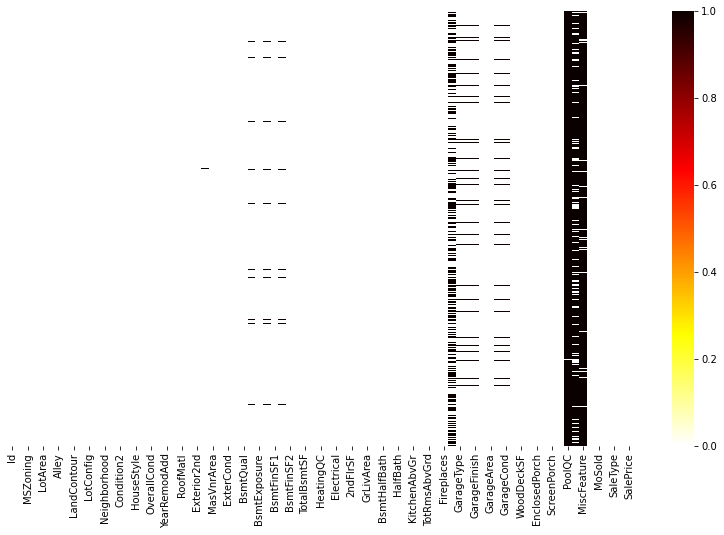

In [40]:
plt.figure(figsize=(14,8))
sns.heatmap(train_text.isnull(), yticklabels=False, cmap='hot_r')

In [41]:
print(train_text.PoolQC.value_counts())

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64


In [42]:
print(train_text.MiscFeature.value_counts())

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64


In [43]:
train_text.PoolQC.fillna(train_text.PoolQC.mode()[0], inplace=True)

In [44]:
test_text.PoolQC.fillna(test_text.PoolQC.mode()[0], inplace=True)

In [45]:
train_text.MiscFeature.fillna(train_text.MiscFeature.mode()[0], inplace=True)

In [46]:
test_text.MiscFeature.fillna(test_text.MiscFeature.mode()[0], inplace=True)

<AxesSubplot:>

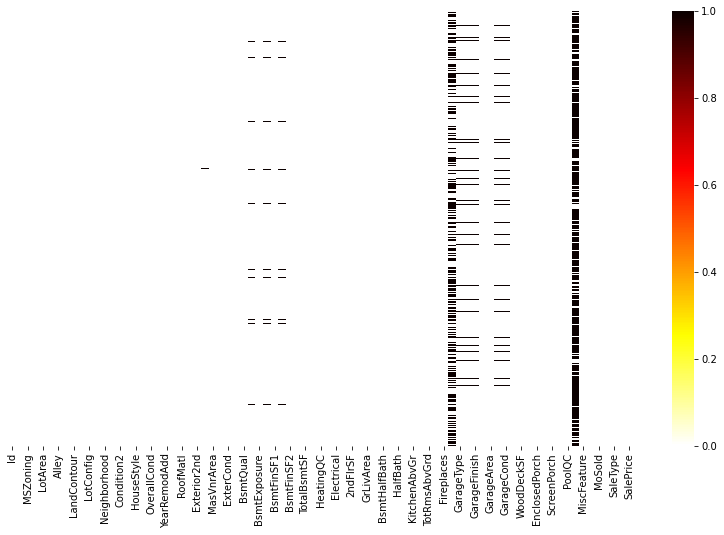

In [47]:
plt.figure(figsize=(14,8))
sns.heatmap(train_text.isnull(), yticklabels=False, cmap='hot_r')

In [48]:
train_text.isna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [49]:
print(train_text.Fence.value_counts())

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64


In [50]:
train_text.Fence.fillna(train_text.Fence.mode()[0], inplace=True)

In [51]:
test_text.Fence.fillna(test_text.Fence.mode()[0], inplace=True)

In [52]:
print(train_text.FireplaceQu.value_counts())

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


In [53]:
train_text.FireplaceQu.fillna(train_text.FireplaceQu.mode()[0], inplace=True)

In [54]:
test_text.FireplaceQu.fillna(test_text.FireplaceQu.mode()[0], inplace=True)

In [55]:
print(train_text.GarageType.value_counts())

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


In [56]:
train_text.GarageType.fillna(train_text.GarageType.mode()[0], inplace=True)

In [57]:
test_text.GarageType.fillna(test_text.GarageType.mode()[0], inplace=True)

In [58]:
print(train_text.GarageFinish.value_counts())

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64


In [59]:
train_text.GarageFinish.fillna(train_text.GarageFinish.mode()[0], inplace=True)

In [60]:
test_text.GarageFinish.fillna(test_text.GarageFinish.mode()[0], inplace=True)

In [61]:
print(train_text.GarageCond.value_counts())

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


In [62]:
print(train_text.GrLivArea.value_counts())

864     22
1040    14
894     11
1456    10
848     10
        ..
2296     1
1123     1
1199     1
1473     1
1256     1
Name: GrLivArea, Length: 861, dtype: int64


In [63]:
train_text.GarageCond.fillna(train_text.GarageCond.mode()[0], inplace=True)

In [64]:
test_text.GarageCond.fillna(test_text.GarageCond.mode()[0], inplace=True)

In [65]:
train_text.GrLivArea.fillna(train_text.GrLivArea.mode()[0], inplace=True)

In [66]:
test_text.GrLivArea.fillna(test_text.GrLivArea.mode()[0], inplace=True)

In [67]:
train_text.BsmtFinType2.fillna(train_text.BsmtFinType2.mode()[0], inplace=True)

In [68]:
test_text.BsmtFinType2.fillna(test_text.BsmtFinType2.mode()[0], inplace=True)

In [69]:
train_text.MasVnrType.fillna(train_text.MasVnrType.mode()[0], inplace=True)

In [70]:
test_text.MasVnrType.fillna(test_text.MasVnrType.mode()[0], inplace=True)

In [71]:
train_text.BsmtCond.fillna(train_text.BsmtCond.mode()[0], inplace=True)

In [72]:
test_text.BsmtCond.fillna(test_text.BsmtCond.mode()[0], inplace=True)

In [73]:
train_text.BsmtExposure.fillna(train_text.BsmtExposure.mode()[0], inplace=True)

In [74]:
test_text.BsmtExposure.fillna(test_text.BsmtExposure.mode()[0], inplace=True)

In [75]:
train_text.BsmtFinType1.fillna(train_text.BsmtFinType1.mode()[0], inplace=True)

In [76]:
test_text.BsmtFinType1.fillna(test_text.BsmtFinType1.mode()[0], inplace=True)

In [77]:
train_text.GarageYrBlt.fillna(train_text.GarageYrBlt.mode()[0], inplace=True)

In [78]:
test_text.GarageYrBlt.fillna(test_text.GarageYrBlt.mode()[0], inplace=True)

In [79]:
train_text.GarageQual.fillna(train_text.GarageQual.mode()[0], inplace=True)

In [80]:
test_text.GarageQual.fillna(test_text.GarageQual.mode()[0], inplace=True)

<AxesSubplot:>

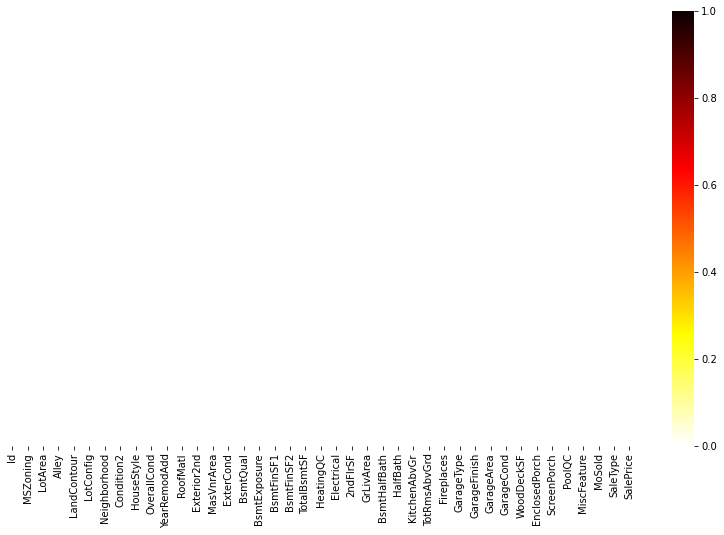

In [81]:
plt.figure(figsize=(14,8))
sns.heatmap(train_text.isnull(), yticklabels=False, cmap='hot_r')

In [82]:
print(test_text.MSZoning.value_counts())

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64


In [83]:
test_text.MSZoning.fillna(test_text.MSZoning.mode()[0], inplace=True)

In [84]:
test_text.Utilities.fillna(test_text.Utilities.mode()[0], inplace=True)

In [85]:
test_text.Functional.fillna(test_text.Functional.mode()[0], inplace=True)

In [86]:
test_text.KitchenQual.fillna(test_text.KitchenQual.mode()[0], inplace=True)

<AxesSubplot:>

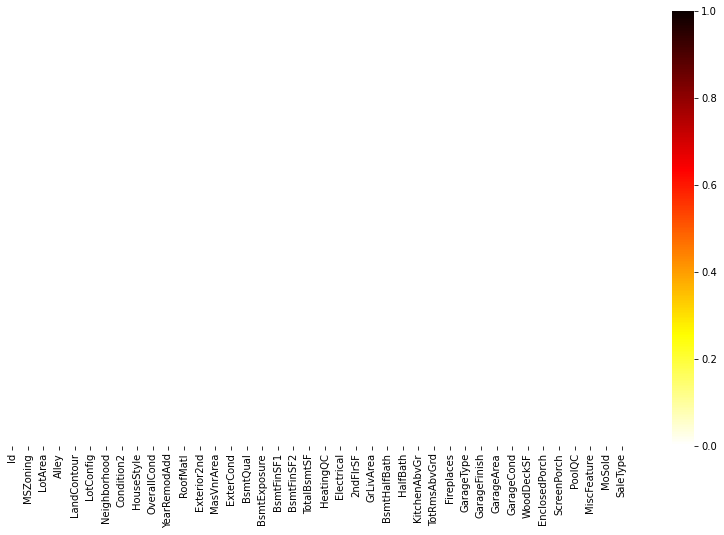

In [87]:
plt.figure(figsize=(14,8))
sns.heatmap(test_text.isnull(), yticklabels=False, cmap='hot_r')

In [88]:
train_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [89]:
train_text=train_text.astype({'LotFrontage': int,'MasVnrArea': int,'GarageYrBlt': int})

In [90]:
train_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   int64 
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [91]:
test_text.BsmtFinSF2.fillna(test_text.BsmtFinSF2.mode()[0], inplace=True)

In [92]:
test_text.BsmtUnfSF.fillna(test_text.BsmtUnfSF.mode()[0], inplace=True)

In [93]:
test_text.TotalBsmtSF.fillna(test_text.TotalBsmtSF.mode()[0], inplace=True)

In [94]:
test_text.BsmtFullBath.fillna(test_text.BsmtFullBath.mode()[0], inplace=True)

In [95]:
test_text.BsmtHalfBath.fillna(test_text.BsmtHalfBath.mode()[0], inplace=True)

In [96]:
test_text.GarageCars.fillna(test_text.GarageCars.mode()[0], inplace=True)

In [97]:
test_text.GarageArea.fillna(test_text.GarageArea.mode()[0], inplace=True)

In [98]:
test_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [99]:
test_text=test_text.astype({'LotFrontage': int,'MasVnrArea': int,'BsmtFinSF2': int,'BsmtUnfSF': int,'TotalBsmtSF': int,'BsmtFullBath': int,'BsmtHalfBath': int})

In [100]:
test_text=test_text.astype({'GarageYrBlt': int,'GarageCars': int,'GarageArea': int,'BsmtFinSF1': int})

In [101]:
test_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1459 non-null   int64 
 1   MSSubClass     1459 non-null   int64 
 2   MSZoning       1459 non-null   object
 3   LotFrontage    1459 non-null   int64 
 4   LotArea        1459 non-null   int64 
 5   Street         1459 non-null   object
 6   Alley          1459 non-null   object
 7   LotShape       1459 non-null   object
 8   LandContour    1459 non-null   object
 9   Utilities      1459 non-null   object
 10  LotConfig      1459 non-null   object
 11  LandSlope      1459 non-null   object
 12  Neighborhood   1459 non-null   object
 13  Condition1     1459 non-null   object
 14  Condition2     1459 non-null   object
 15  BldgType       1459 non-null   object
 16  HouseStyle     1459 non-null   object
 17  OverallQual    1459 non-null   int64 
 18  OverallCond    1459 non-null

設定feature

In [102]:
feature=['MSSubClass','MSZoning','LotArea','LotShape','Street','LandContour',
         'Utilities','LandSlope','Condition1','Condition2','Neighborhood',
         'BldgType','HouseStyle','YearRemodAdd','OverallQual','OverallCond','YearBuilt',
         'Exterior1st','Exterior2nd','MasVnrArea','ExterCond','BsmtFullBath','Foundation',
         'BsmtCond','TotalBsmtSF','CentralAir','Electrical','BsmtFullBath','BsmtFinSF1','RoofMatl',
         '1stFlrSF','2ndFlrSF','GrLivArea','BedroomAbvGr','BsmtFinSF2',
         'KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces','GarageCars',
         'GarageType','GarageFinish','GarageArea','GarageCond','SaleType',
         'OpenPorchSF','PoolArea','MoSold','YrSold','SalePrice']

In [103]:
data=train_text[feature]

In [104]:
train_data=data.dropna(axis=1)

In [105]:
train_data.head()

,MSSubClass,MSZoning,LotArea,LotShape,Street,LandContour,Utilities,LandSlope,Condition1,Condition2,...,GarageType,GarageFinish,GarageArea,GarageCond,SaleType,OpenPorchSF,PoolArea,MoSold,YrSold,SalePrice
0,60,RL,8450,Reg,Pave,Lvl,AllPub,Gtl,Norm,Norm,...,Attchd,RFn,548,TA,WD,61,0,2,2008,208500
1,20,RL,9600,Reg,Pave,Lvl,AllPub,Gtl,Feedr,Norm,...,Attchd,RFn,460,TA,WD,0,0,5,2007,181500
2,60,RL,11250,IR1,Pave,Lvl,AllPub,Gtl,Norm,Norm,...,Attchd,RFn,608,TA,WD,42,0,9,2008,223500
3,70,RL,9550,IR1,Pave,Lvl,AllPub,Gtl,Norm,Norm,...,Detchd,Unf,642,TA,WD,35,0,2,2006,140000
4,60,RL,14260,IR1,Pave,Lvl,AllPub,Gtl,Norm,Norm,...,Attchd,RFn,836,TA,WD,84,0,12,2008,250000


In [106]:
X=data.loc[:,'MSSubClass':'YrSold']
y=data['SalePrice']

In [107]:
type(X.loc[0,'MSSubClass'])

numpy.int64

In [108]:
from sklearn import preprocessing

資料編碼

In [109]:
label_encoder = preprocessing.LabelEncoder()
for c in X.columns:
    if (type(X.loc[0,c])==str):
        X[c]= label_encoder.fit_transform(X[c])
    elif type(X.loc[0,c])==int:
        X[c]=X[c]

In [110]:
from sklearn.model_selection import train_test_split

分開資料來訓練

In [111]:
X_train,X_val,y_train,y_val=train_test_split(X,y,random_state=1)

In [112]:
X

,MSSubClass,MSZoning,LotArea,LotShape,Street,LandContour,Utilities,LandSlope,Condition1,Condition2,...,GarageCars,GarageType,GarageFinish,GarageArea,GarageCond,SaleType,OpenPorchSF,PoolArea,MoSold,YrSold
0,60,3,8450,3,1,3,0,0,2,2,...,2,1,1,548,4,8,61,0,2,2008
1,20,3,9600,3,1,3,0,0,1,2,...,2,1,1,460,4,8,0,0,5,2007
2,60,3,11250,0,1,3,0,0,2,2,...,2,1,1,608,4,8,42,0,9,2008
3,70,3,9550,0,1,3,0,0,2,2,...,3,5,2,642,4,8,35,0,2,2006
4,60,3,14260,0,1,3,0,0,2,2,...,3,1,1,836,4,8,84,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,7917,3,1,3,0,0,2,2,...,2,1,1,460,4,8,40,0,8,2007
1456,20,3,13175,3,1,3,0,0,2,2,...,2,1,2,500,4,8,0,0,2,2010
1457,70,3,9042,3,1,3,0,0,2,2,...,1,1,1,252,4,8,60,0,5,2010
1458,20,3,9717,3,1,3,0,0,2,2,...,1,1,2,240,4,8,0,0,4,2010


隨機森林訓練

In [113]:
from sklearn.ensemble import RandomForestRegressor

In [114]:
model=RandomForestRegressor(random_state=3)

In [115]:
model.fit(X_train,y_train)

RandomForestRegressor(random_state=3)

In [116]:
pred=model.predict(X_val)

In [117]:
from sklearn.metrics import mean_absolute_error

In [118]:
mean_absolute_error(y_val,pred)

16533.154273972603

In [119]:
test1 = test_text

In [120]:
test_text=test1[feature[:-1]]

In [121]:
label_encoder = preprocessing.LabelEncoder()
for c in test_text.columns:
    if (type(test_text.loc[0,c])==str):
        test_text[c]= label_encoder.fit_transform(test_text[c])
    elif type(test_text.loc[0,c])==int:
        test_text[c]=test_text[c]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [122]:
from sklearn.impute import SimpleImputer

In [123]:
imp = SimpleImputer(strategy="most_frequent")
test_text=imp.fit_transform(test_text)

In [124]:
test_text=pd.DataFrame(test_text,columns=feature[:-1])

In [125]:
pred=model.predict(test_text)

In [126]:
a=test1['Id'].to_numpy()

In [127]:
data={'Id':a,'SalePrice':pred}

In [128]:
pred_dataframe=pd.DataFrame(data)

In [129]:
pred_dataframe

,Id,SalePrice
0,1461,130014.08
1,1462,153615.82
2,1463,178187.23
3,1464,183105.00
4,1465,199368.91
...,...,...
1454,2915,82994.50
1455,2916,86222.00
1456,2917,156739.42
1457,2918,121076.58


輸出為CSV檔

In [130]:
pred_dataframe.to_csv('testdata.csv',index=False)

Linear Regression 訓練

In [131]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [132]:
model = lr.fit(X_train, y_train)

In [133]:
model.fit(X_train,y_train)

LinearRegression()

In [134]:
predlr=model.predict(X_val)

In [135]:
mean_absolute_error(y_val,predlr)

20740.86330888745

In [136]:
predlr=model.predict(test_text)

In [137]:
a=test1['Id'].to_numpy()

In [138]:
data={'Id':a,'SalePrice':predlr}

In [139]:
predlr_dataframe=pd.DataFrame(data)

In [140]:
predlr_dataframe

,Id,SalePrice
0,1461,102792.020827
1,1462,159052.656298
2,1463,160134.511443
3,1464,198903.642491
4,1465,178585.595589
...,...,...
1454,2915,57215.370037
1455,2916,64907.283617
1456,2917,165008.316020
1457,2918,105688.125439


輸出為CSV檔

In [141]:
predlr_dataframe.to_csv('testdata_lr.csv',index=False)